In [1]:
import tools
import pipeSym_func as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pipeSym_func as sys
import math

In [2]:
t, dt, cf, Re, Xmax, epsr, lx, Jm, lt, nsym, vel2 = tools.get_scp("../orig-edge/Re2200-mean2.scp")

In [3]:
print t, dt, cf, Re, Xmax, epsr, lx, Jm, lt, nsym, vel2.max()

59.6124554189 0.298062277094 0.688934885581 2200.0 120.0 0.25 10 40 5 2 0.999766154013


In [4]:
t, dt, cf, Re, Xmax, epsr, lx, Jm, lt, nsym, vel = tools.get_scp("../orig-edge/Re2200-mean.scp")

In [5]:
print t, dt, cf, Re, Xmax, epsr, lx, Jm, lt, nsym, vel.max()

59.6124554189 0.298062277094 0.688934885581 2200.0 120.0 0.25 10 40 5 2 0.99988307017


In [6]:
sym.init(Xmax, epsr, nsym, lx, Jm, lt, Re=Re)

In [7]:
sym.look()

Xmax=120.000000, epsr=0.250000, nsym=2
Im=1024, Jm=40, Km=32
hx=0.117188, ht=0.049087, real_nsym=2.000000
Re=2200.000000


In [8]:
x = np.linspace(0,Xmax,2**lx, endpoint=False)

In [9]:
puls = vel2 - vel**2

In [10]:
upuslx = tools.cs_mean(puls[0], Jm, epsr, lt, nsym)**0.5
vpuslx = tools.cs_mean(puls[1], Jm, epsr, lt, nsym)**0.5
wpuslx = tools.cs_mean(puls[2], Jm, epsr, lt, nsym)**0.5

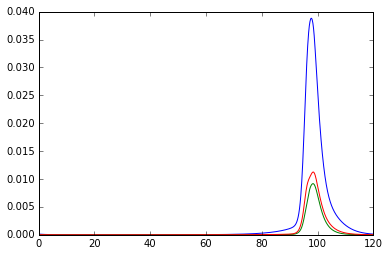

In [11]:
plt.plot(x, upuslx[1:-1])
plt.plot(x, vpuslx[1:-1])
plt.plot(x, wpuslx[1:-1])

In [12]:
ustrx = tools.cs_mean((vel[0] - vel[0,1:-1].mean(0))**2, Jm, epsr, lt, nsym)**0.5
vstrx = tools.cs_mean((vel[1] - vel[1,1:-1].mean(0))**2, Jm, epsr, lt, nsym)**0.5
wstrx = tools.cs_mean((vel[2] - vel[2,1:-1].mean(0))**2, Jm, epsr, lt, nsym)**0.5

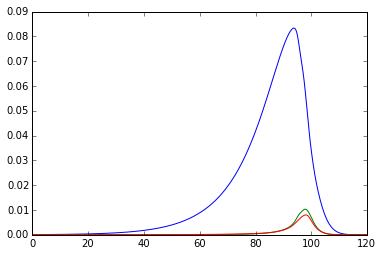

In [13]:
plt.plot(x, ustrx[1:-1])
plt.plot(x, vstrx[1:-1])
plt.plot(x, wstrx[1:-1])

In [14]:
t, dt, cf, Re, Xmax, epsr, lx, Jm, lt, nsym, om = tools.get_scp("Re2200_om_mean.scp")

In [15]:
print t, dt, cf, Re, Xmax, epsr, lx, Jm, lt, nsym, om.max()

59.6124554189 0.298062277094 0.688934885581 2200.0 120.0 0.25 10 40 5 2 3.48833853947


In [16]:
oxx = tools.cs_mean(om[0]**2, Jm, epsr, lt, nsym)**0.5

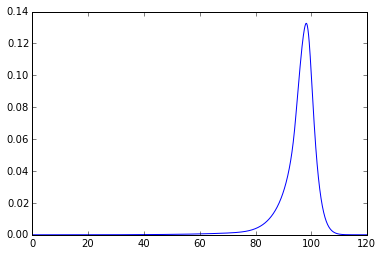

In [17]:
plt.plot(x, oxx[1:-1])

In [18]:
t, dt, Dp, Re, Xmax, epsr, lx, Jm, lt, nsym, d = tools.get_scp("part_deform_mean.scp")

In [19]:
print t, dt, cf, Re, Xmax, epsr, lx, Jm, lt, nsym, d.max()

0.0 0.1 0.688934885581 2200.0 120.0 0.25 10 40 5 2 0.0138398632397


In [20]:
d1x = tools.cs_mean(d[1]**2, Jm, epsr, lt, nsym)**0.5
d2x = tools.cs_mean(d[2]**2, Jm, epsr, lt, nsym)**0.5
Dx = tools.cs_mean((d[1]+d[2])**2, Jm, epsr, lt, nsym)**0.5

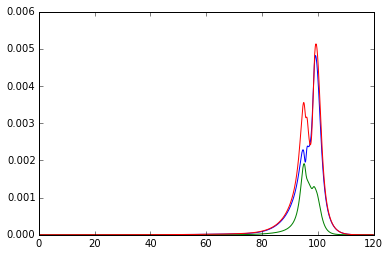

In [21]:
plt.plot(x, d1x[1:-1])
plt.plot(x, d2x[1:-1])
#plt.plot(x, (d1x+d2x)[1:-1])

plt.plot(x, Dx[1:-1])

In [22]:
hx = sym.wr.dimx.hx

In [23]:
10.0/hx

85.333333333333329

In [24]:
nii = 10
ii = [int(795 + i/hx) for i in range(nii)]

In [25]:
ii

[795, 803, 812, 820, 829, 837, 846, 854, 863, 871]

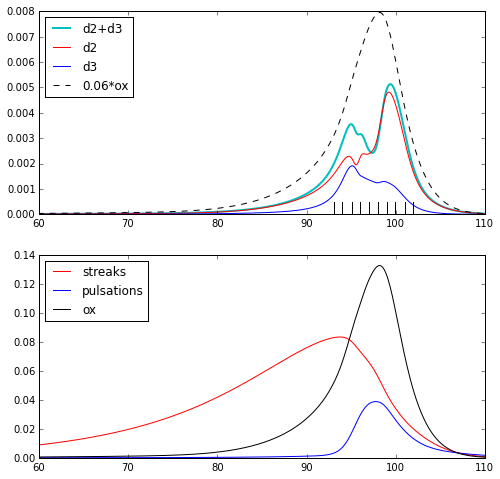

In [26]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(x, Dx[1:-1], "c", lw=2, label="d2+d3")
plt.plot(x, d1x[1:-1], "r", label="d2")
plt.plot(x, d2x[1:-1], "b", label="d3")
plt.plot(x, 0.06*oxx[1:-1], 'k--', label="0.06*ox")
plt.xlim(60,110)
plt.legend(loc=2)

for i in ii:
    plt.plot([x[i-1], x[i-1]], [0.0, 0.0005],  "k")

plt.subplot(2,1,2)
plt.plot(x, ustrx[1:-1], "r", label="streaks")
plt.plot(x, upuslx[1:-1], label="pulsations")
plt.plot(x, oxx[1:-1], "k", label="ox")
plt.xlim(60,110)
plt.legend(loc=2)

In [27]:
(om[0]*d[1]).max()

0.0008766554416146273

In [28]:
od2x = tools.cs_mean(om[0]*d[1], Jm, epsr, lt, nsym)
od3x = tools.cs_mean(om[0]*d[2], Jm, epsr, lt, nsym)
oDx = tools.cs_mean(om[0]*(d[1]+d[2]), Jm, epsr, lt, nsym)

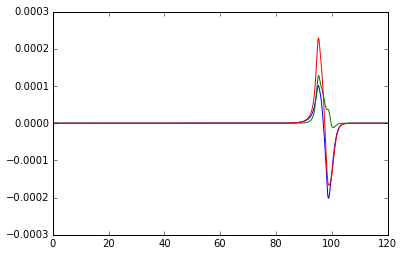

In [29]:
plt.plot(x, od2x[1:-1])
plt.plot(x, od3x[1:-1])
plt.plot(x, oDx[1:-1])

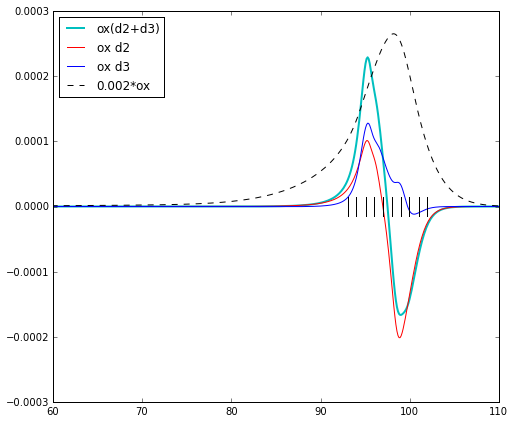

In [30]:
plt.figure(figsize=(8,7))

plt.plot(x, oDx[1:-1], "c", lw=2, label="ox(d2+d3)")
plt.plot(x, od2x[1:-1], "r", label="ox d2")
plt.plot(x, od3x[1:-1], "b", label="ox d3")
plt.plot(x, 0.002*oxx[1:-1], 'k--', label="0.002*ox")
plt.xlim(60,110)
plt.legend(loc=2)

for i in ii:
    plt.plot([x[i-1], x[i-1]], [-0.000015, 0.000015],  "k")

In [31]:
cf

0.6889348855813127

In [32]:
import matplotlib.ticker
import math
import matplotlib.tri as tri
from matplotlib.ticker import MaxNLocator

def polar_plot(u, u1, amp):
    (umin, umax) =amp
    
    Im = sym.wr.dimx.Im
    Jm = sym.wr.dimr.Jm
    Km = sym.wr.dimt.Km
    
    radius = sym.wr.dimr.yt[1:Jm+1]
    angles = np.linspace(0, math.pi/2, Km, endpoint = False) + sym.wr.dimt.ht/2
    angles = np.repeat( angles[ ..., np.newaxis ], Jm, axis = 1 )

    x = (radius * np.cos( angles )).flatten()
    y = (radius * np.sin( angles )).flatten()
    triang = tri.Triangulation(x, y)

    z = u[1:-1,1:-1].flatten()
    z1 = u1[1:-1,1:-1].flatten() - cf
    
    level0 = MaxNLocator(nbins=1).tick_values(-1, 1)
    levels = MaxNLocator(nbins=16).tick_values(umin, umax)
    scmap = plt.get_cmap()

    plt.gca().set_aspect('equal')
    plt.tricontourf( triang, z, levels = levels, cmap = scmap)
    plt.tricontour ( triang, z1, colors = 'k', levels = level0)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.0)

    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    #ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    return

In [33]:
ii

[795, 803, 812, 820, 829, 837, 846, 854, 863, 871]

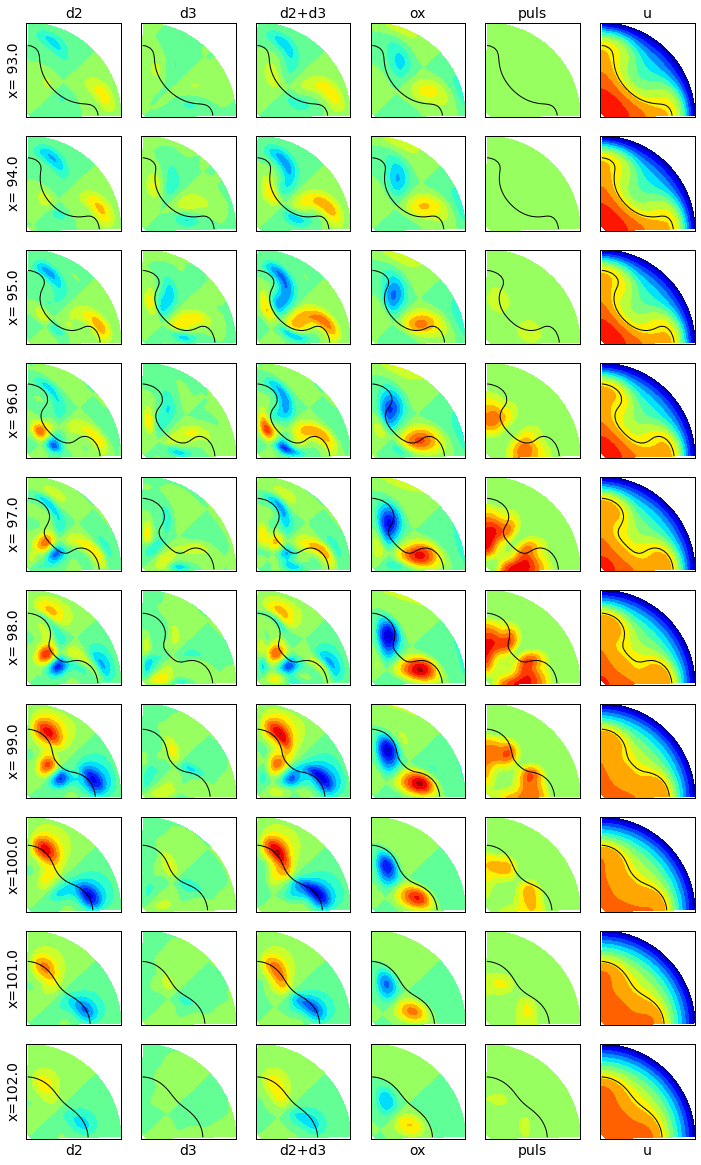

In [38]:
plt.figure(figsize=(12,20))

damp = max(d[1, 1:-1,1:-1,1:-1].max(), d[2,1:-1,1:-1,1:-1].max(), (d[1]+d[2])[1:-1,1:-1,1:-1].max())
omax = om[0,1:-1,1:-1,1:-1].max()
pmax = puls[0,1:-1,1:-1,1:-1].max()

n=1
for u,amp in ((d[1], (-damp, damp)), (d[2], (-damp, damp)), (d[1]+d[2], (-damp, damp)), 
              (om[0], (-omax, omax)), (puls[0], (-pmax, pmax)), (vel[0], (0,1))):
    m = n
    for i in ii:
        plt.subplot(nii,6,m)
        
        if m <= 6:
            plt.title({1:"d2", 2:"d3", 3:"d2+d3", 4:"ox", 5:"puls", 6:"u"}[m], fontsize=14)
        
        if m > (nii - 1) * 6:
            plt.xlabel({1:"d2", 2:"d3", 3:"d2+d3", 4:"ox", 5:"puls", 6:"u"}[m - (nii - 1) * 6], fontsize=14)
        
        if n == 1:
            plt.ylabel("x=%5.1f" % round(x[i]), fontsize=14)
            
        polar_plot(u[:,:,i], vel[0,:,:,i], amp)
        
        m += 6
        
    n += 1
